In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

# PSD code
from scipy import signal
from scipy import interpolate
import h5py
import copy

# import personal code
from model_kit import psd_functions as psd
from model_kit import datafiles as dfx

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#print('This notebook is not stale yet!')

def rms(data):
    return np.sqrt(np.sum(np.square(data))/len(data))

def sn_map(data, mask):
    data_sn = copy.copy(data)
    data_sn[mask==0] = np.nan
    return data_sn

In [22]:
opt_name = ['M3', 'OAP1', 'OAP2', 'OAP3']
opt_name = np.repeat(opt_name,2)
sn_set = [1,2,1,2,2,3,1,2]
tot_opt = len(sn_set)
dx_set = np.zeros(tot_opt)
max_set = np.zeros(tot_opt)
min_set = np.zeros(tot_opt)
rms_set = np.zeros(tot_opt)

surf = []
mask = []

for jopt in range(0, len(opt_name)):
    filename = '{0}/{0}_SN{1}_80CA_pp_'.format(opt_name[jopt], sn_set[jopt])
    hdu = fits.open(filename+'surf.fits')[0]
    # for local in-loop data collecting
    surf_data = hdu.data
    mask_data = fits.open(filename+'mask.fits')[0].data
    active_data = surf_data[mask_data==1]
    # for full notebook data access
    surf.append(surf_data)
    mask.append(mask_data)
    dx_set[jopt] = hdu.header['latres']
    max_set[jopt] = np.amax(active_data)
    min_set[jopt] = np.amin(active_data)
    rms_set[jopt] = rms(active_data)

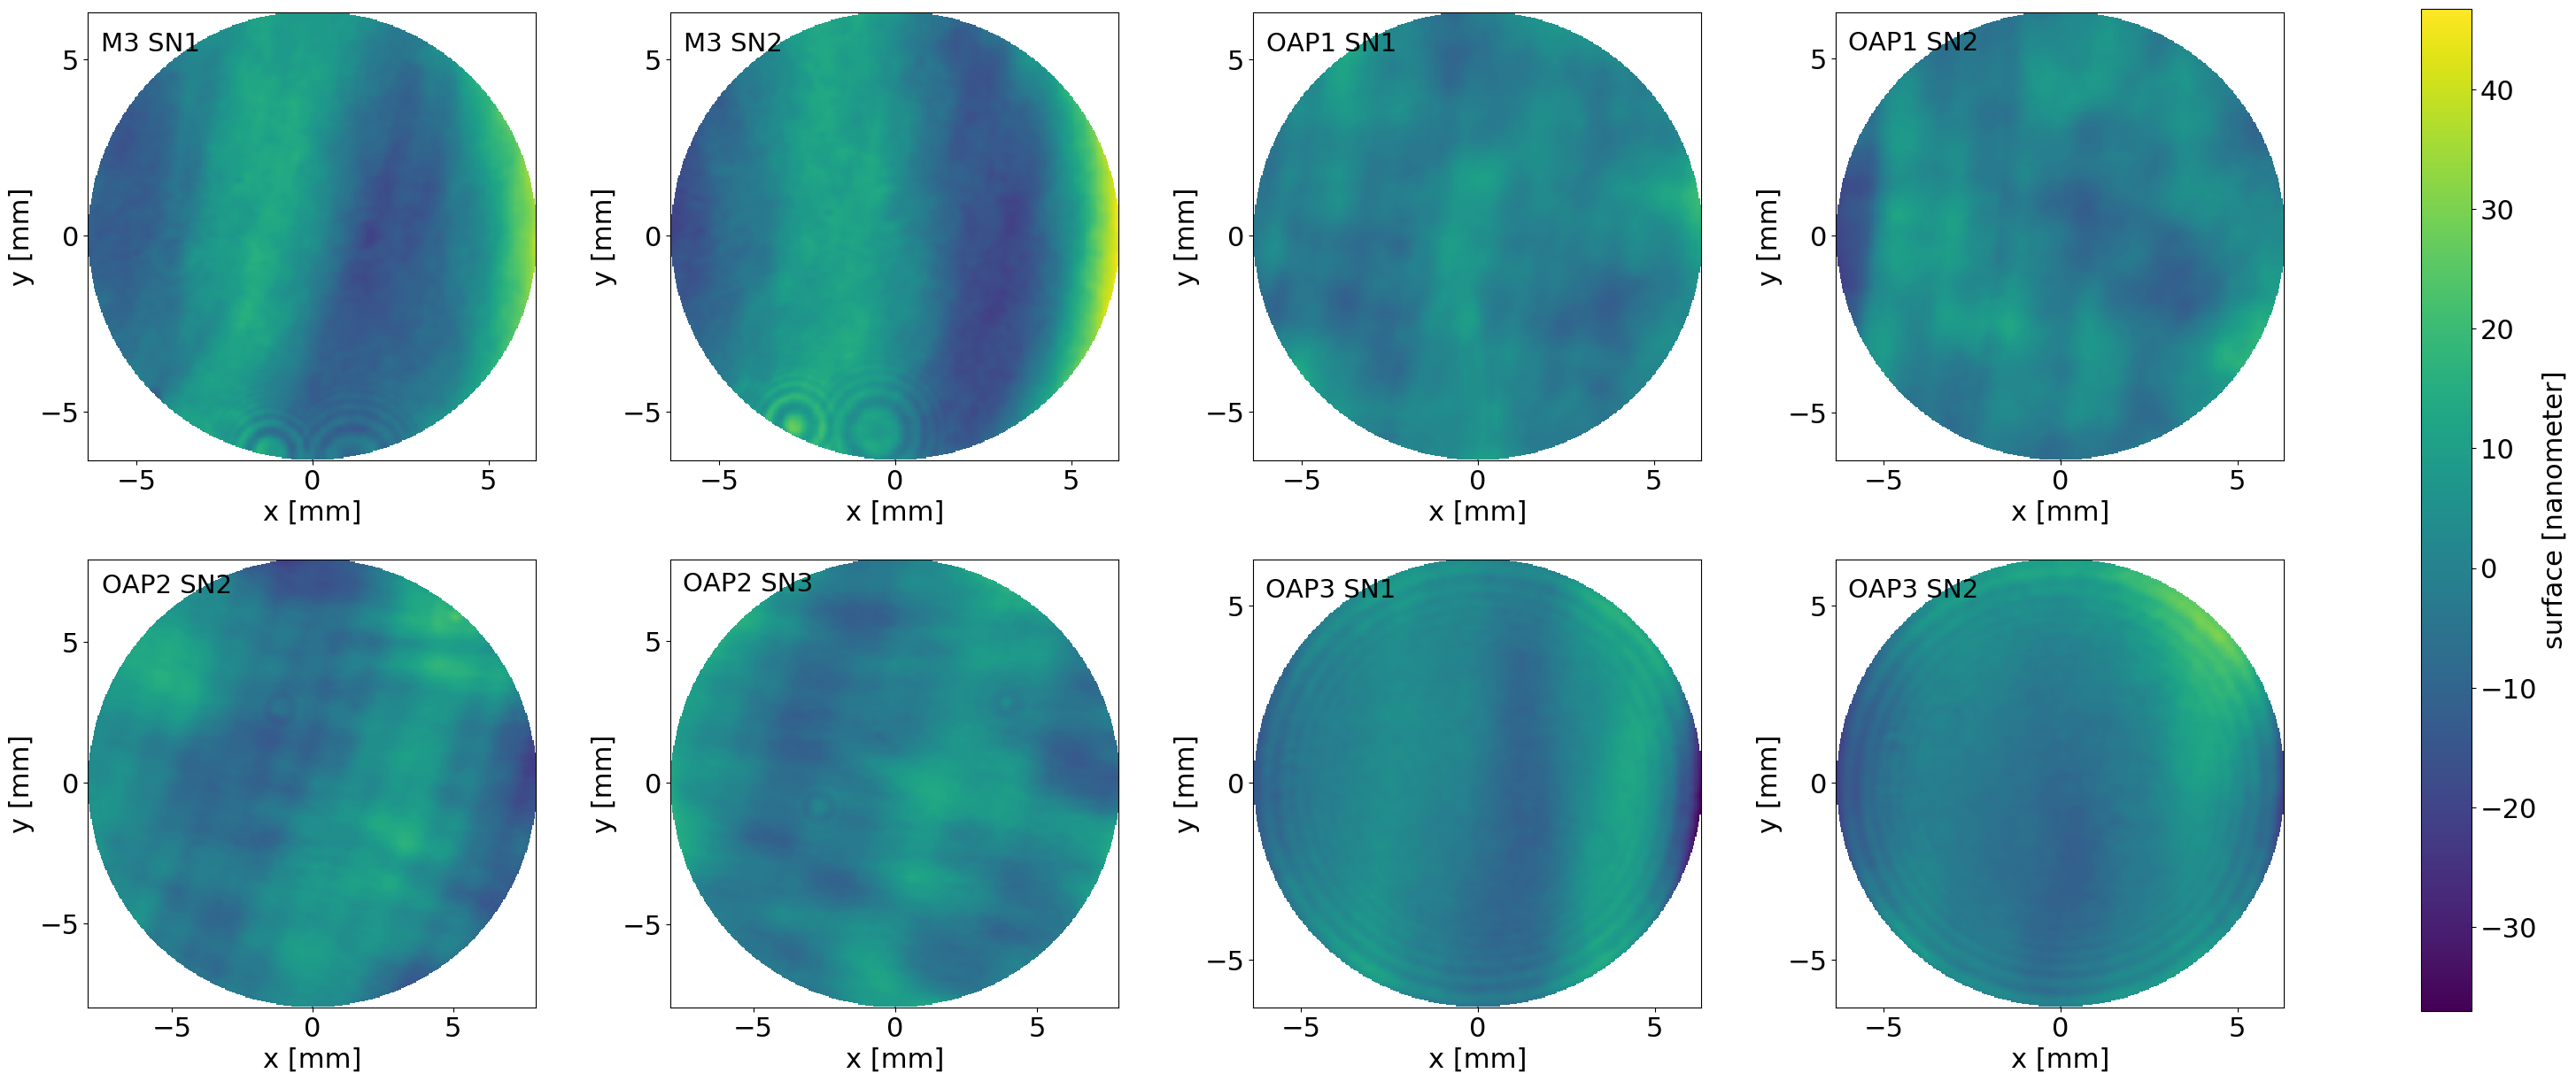

In [48]:
# set the axis scaling
vmin = np.amin(min_set)
vmax = np.amax(max_set)

text_pos = [(-6, 5.25), (-6, 5.25),
            (-6, 5.25), (-6, 5.25),
            (-7.5, 6.75), (-7.5, 6.75),
            (-6, 5.25), (-6, 5.25)]

matplotlib.rcParams["font.size"]=22
fig, axes = plt.subplots(nrows=2, ncols=4, dpi=100, facecolor='white',
                         figsize=(40,15))#, dpi=100)
fig.subplots_adjust(wspace=0.3)

n=0
for ax in axes.flat:
    # nan mask the data
    sn_data = sn_map(surf[n], mask[n])
    # set up the data range
    box = int(surf[n].shape[0]/2)
    rk = np.linspace(-box, box, (box*2), endpoint=False)
    rks = (rk*dx_set[n]*1e3*u.mm) # dx_set is in meters
    rks_extent = [np.amin(rks).value, np.amax(rks).value, 
                  np.amin(rks).value, np.amax(rks).value]
    im = ax.imshow(sn_data, origin='lower',
                   extent=rks_extent, vmin=vmin, vmax=vmax)
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    ax.set_xlabel('x [{0}]'.format(str(rks.unit)))
    ax.set_ylabel('y [{0}]'.format(str(rks.unit)))
    oap_name = '{0} SN{1}'.format(opt_name[n], sn_set[n])
    ax.text(text_pos[n][0], text_pos[n][1], oap_name, fontsize=21, color='black')
    n += 1
    
fig.colorbar(im, ax=axes.ravel().tolist()).set_label('surface [{0}]'.format('nanometer'))
plt.show()